In [26]:
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter
from skimage import data, io, filters
from skimage import feature as ft
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from collections import Counter


### 1.Read the images

In [33]:
X = []
y = []

for j in range (0,43):
    dataset_path = "F:\\NUS SOC Summer Workshop\\Project 1_ Traffic Sign Recogniti\\Dataset_2_Train\\Train\\" + str(j)
    for i in glob.glob(dataset_path + '\\*.png', recursive=True):
        label = i.split("Train")[2][3:8]
        # write code to read ecah file i, and append it to list X
        y.append(label)
        X.append(cv2.imread(i))
       
print(len(y))
print(len(X))

39209
39209


### 2.Pre-processing images

#### resize48by48 & grayscale

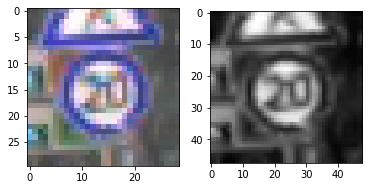

In [34]:
X_processed=[]
for x in X:
    # Write code to resize image x to 48x48 and store in temp_x
    temp_x = cv2.resize(x, (48, 48))
    # Write code to convert temp_x to grayscale
    temp_x = cv2.cvtColor(temp_x, cv2.COLOR_BGR2GRAY)
    # Append the converted image into X_processed
    X_processed.append(temp_x)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(X[0])
fig.add_subplot(1, 2, 2)
plt.imshow(X_processed[0],cmap='gray')


#### equalize to make the samples distribute more uniformly

In [35]:
# 统计每种标志的个数，并记录在valuelist中
counter={}
for i in y:
     #List.count(i)统计列表元素对应的个数
    if y.count(i) > 0:
        counter[i] = y.count(i)
valuelist=[]
for key, value in counter.items():
    valuelist.append(value)
print(np.mean(valuelist))
print(np.median(valuelist))

# 切片
sliceList_X=[]
sliceList_y=[]
start=0
for i in range (0,len(valuelist)):
    sliceList_y.append(y[start:start+valuelist[i]])
    sliceList_X.append(X_processed[start:start+valuelist[i]])
    start=start+valuelist[i]

# 补齐至中位数
m=int(np.median(valuelist))
for i in range (0,len(valuelist)):
    if valuelist[i]<m:
        n=m-valuelist[i]
        k=0
        for j in range(0,n):            
            sliceList_y[i].append(sliceList_y[i][k])
            sliceList_X[i].append(sliceList_X[i][k])
            k=k+1
            if k==valuelist[i]:
                k=0
                
# 合并
y=[]
X_processed=[]
for i in range (0,len(valuelist)):
    y.extend(sliceList_y[i])
    X_processed.extend(sliceList_X[i])

print(len(X_processed))
print(len(y))

2800.6428571428573
1665.0
43664
43664


### 3.Calculating Features

In [36]:
X_features = []
for x in X_processed:
    x_feature = ft.hog(x, orientations=8, pixels_per_cell=(10, 10),cells_per_block=(1, 1), visualize=False, multichannel=False)
    X_features.append(x_feature)

### 4.Training and testing the classifier

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size = 0.2)
# SVC
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9189282033665407